# Logistic Regression in 1D

Steps to model target variables between $y(x) \in [0,1]$:
* Train model y_m(x)=sigmoid(a*x+b), with parameters a,b, could be enhanced to a being a matrix
* Determine a,b via gradient descent on loss function which is Cross-Entropy


In [1]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def compute_loss(y_train, y_pred):
    # crossentropy loss which is to be minimized
    return -np.sum(
        y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred), axis=0
    )


class Logistic_Regression:
    def __init__(self):
        self.a = 0
        self.b = 0

    def fit(self, train_set):
        x_train = train_set[:, 0]
        y_train = train_set[:, 1]
        loss = 100
        last_loss = 0
        counter = 0
        while abs(loss - last_loss) > 1e-5:
            y_pred = sigmoid(self.a * x_train + self.b)
            loss = compute_loss(y_train, y_pred)
            # do gradient decent on cross entropy loss with respect to parameters a and b
            lr = 0.001
            # compare https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2 for gradients
            d_loss_da = np.average((y_pred - y_train) * x_train)
            d_loss_db = np.average((y_pred - y_train))
            self.a -= lr * d_loss_da
            self.b -= lr * d_loss_db
            y_pred = sigmoid(self.a * x_train + self.b)
            last_loss = float(loss)
            loss = compute_loss(y_train, y_pred)
            counter += 1
            if counter % 5000 == 0:
                print(f"Epoch {counter} loss {loss}")
        return self.a, self.b

In [2]:
# generate train set
loc_a = 1
loc_b = -6
num_samples = 100
train_set = np.concatenate(
    (
        np.concatenate(
            (
                np.random.normal(loc=(loc_a,), scale=1, size=(num_samples, 1)),
                np.ones(shape=(num_samples, 1)),
            ),
            axis=1,
        ),
        np.concatenate(
            (
                np.random.normal(loc=(loc_b,), scale=1, size=(num_samples, 1)),
                np.zeros(shape=(num_samples, 1)),
            ),
            axis=1,
        ),
    ),
    axis=0,
)
test_set = np.concatenate(
    (
        np.concatenate(
            (
                np.random.normal(loc=(loc_a,), scale=1, size=(num_samples, 1)),
                np.ones(shape=(num_samples, 1)),
            ),
            axis=1,
        ),
        np.concatenate(
            (
                np.random.normal(loc=(loc_b,), scale=1, size=(num_samples, 1)),
                np.zeros(shape=(num_samples, 1)),
            ),
            axis=1,
        ),
    ),
    axis=0,
)

# inplace shuffle
np.random.shuffle(test_set)
np.random.shuffle(train_set)

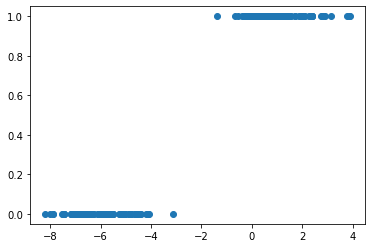

In [3]:
import matplotlib.pyplot as plt

plt.scatter(train_set[:, 0], train_set[:, 1])

In [4]:
x_train = train_set[:, 0]
y_train = train_set[:, 1]
log_reg = Logistic_Regression()
a, b = log_reg.fit(train_set)
y_pred = sigmoid(a * x_train + b)

Epoch 5000 loss 25.259155650323656
Epoch 10000 loss 16.748110193109184
Epoch 15000 loss 12.613362574485596
Epoch 20000 loss 10.136286449291358
Epoch 25000 loss 8.482901115485408
Epoch 30000 loss 7.301178773695266
Epoch 35000 loss 6.415113040004989
Epoch 40000 loss 5.726563973551538
Epoch 45000 loss 5.176411736526519
Epoch 50000 loss 4.726911357649658
Epoch 55000 loss 4.352842456757902
Epoch 60000 loss 4.0367225221674365
Epoch 65000 loss 3.7660590002754417
Epoch 70000 loss 3.5316935270597045
Epoch 75000 loss 3.3267632971585
Epoch 80000 loss 3.1460270330207303
Epoch 85000 loss 2.985414635197547
Epoch 90000 loss 2.841718578196833
Epoch 95000 loss 2.7123776942042968
Epoch 100000 loss 2.5953226807219822
Epoch 105000 loss 2.488863758410611
Epoch 110000 loss 2.3916076807604227
Epoch 115000 loss 2.302395545721824
Epoch 120000 loss 2.2202555862696083
Epoch 125000 loss 2.1443669041379714
Epoch 130000 loss 2.0740313048393197
Epoch 135000 loss 2.0086512034701074
Epoch 140000 loss 1.947712131030052

Let's check how well the logistic regression worked: if the difference in prediction and label is close to zero, then the regression worked rather well.

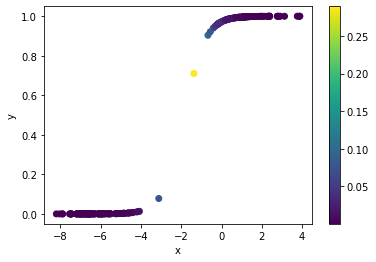

In [5]:
plt.scatter(x_train, y_pred, c=np.abs(y_pred - y_train))
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

Let s check that both labels, 0 and 1 are output:

In [6]:
print(np.sum(y_pred > 0.5), np.sum(y_pred < 0.5))

100 100
